In [1]:
import numpy as np                    # NumPyをインポート
import matplotlib.pyplot as plt       # Matplotlibをインポート
%matplotlib inline

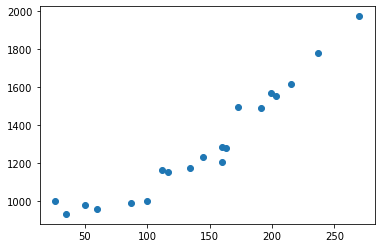

In [2]:
# データのプロット
data = np.loadtxt(fname='sales.csv',  # 読み込むファイル
                  dtype='int',        # データ型を指定
                  delimiter=',',      # 区切り文字を指定
                  skiprows=1          # 1行目のタイトルを読み飛ばす
                  )
train_x = data[:,0]                   # 1列目のデータをxに代入
train_y = data[:,1]                   # 2列目のデータをyに代入

plt.plot(train_x,                     # x軸に割り当てるデータ
         train_y,                     # y軸に割り当てるデータ
         'o'                          # ドット(点)をプロットする
         ) 
plt.show()                            # グラフを表示

In [3]:
def standardize(x):
    '''標準化を行う
    
    Parameters:
      x(ndarray): 標準化前のx
    '''
    x_mean = x.mean()                 # 平均値を求める
    std = x.std()                     # 標準偏差を求める    
    return (x - x_mean)/std           # 標準化した値を返す

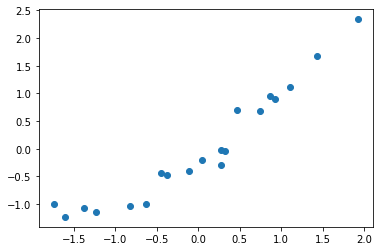

In [4]:
# 訓練データを読み込んでxを標準化する
data = np.loadtxt(fname='sales.csv',  # 読み込むファイル
                  dtype='int',        # データ型を指定
                  delimiter=',',      # 区切り文字を指定
                  skiprows=1          # 1行目のタイトルを読み飛ばす
                  )
train_x = data[:,0]                   # 1列目の成分をxに代入
train_y = data[:,1]                   # 2列目の成分をyに代入
train_x_std = standardize(train_x)    # train_xを標準化
train_y_std = standardize(train_y)    # train_yを標準化

plt.plot(train_x_std,                 # x軸に割り当てるデータ
         train_y_std,                 # y軸に割り当てるデータ
         'o'                          # ドット(点)をプロットする
         ) 
plt.show()                            # グラフを表示

In [5]:
import tensorflow as tf

a = tf.Variable(0.) # 重みを保持するVariableオブジェクト
b = tf.Variable(0.) # バイアスを保持するVariableオブジェクト

In [6]:
def model(x):
    '''回帰モデル y = ax + b
    
    Parameters:
      x(ndarray):分析するデータ
    '''
    y = a*x + b
    return y

In [7]:
def loss(y_pred, y_true):
    '''MSE(平均二乗誤差)
    
    Parameters:
      y_pred(ndarray): 予測値
      y_true(ndarray): 正解値
    '''
    return tf.math.reduce_mean(tf.math.square(y_pred - y_true))

In [8]:
learning_rate = 0.1 # 学習率を設定
epochs = 50         # 学習回数

for i in range(epochs):
    # 自動微分による勾配計算を記録するブロック
    with tf.GradientTape() as tape:
        y_pred = model(train_x_std)
        tmp_loss = loss(y_pred, train_y_std)
    # tapeに記録された操作を使用して誤差の勾配を計算
    gradients = tape.gradient(tmp_loss, [a, b])
    # 勾配降下法の更新式を適用してパラメーター値を更新
    a.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

    # 学習5回ごとに結果を出力
    if (i + 1) % 5 == 0:
        # 処理回数とa、bの値を出力
        print('Step:{} a = {} b = {}'.format(
            i + 1,     # 処理回数
            a.numpy(), # aをndarrayに変換
            b.numpy()) # bをndarrayに変換
             )
        # 損失を出力
        print('Loss = {}'.format(tmp_loss))

Step:5 a = 0.6392353177070618 b = -8.940697071579962e-09
Loss = 0.247664213180542
Step:10 a = 0.8486999273300171 b = -1.7881394143159923e-08
Loss = 0.11228290945291519
Step:15 a = 0.9173372983932495 b = -1.3411044719191523e-08
Loss = 0.09774645417928696
Step:20 a = 0.9398283958435059 b = -1.4901161193847656e-08
Loss = 0.096185602247715
Step:25 a = 0.9471982717514038 b = -1.4901161193847656e-08
Loss = 0.09601801633834839
Step:30 a = 0.9496132731437683 b = -1.4901161193847656e-08
Loss = 0.09600002318620682
Step:35 a = 0.9504045844078064 b = -1.3411045607369942e-08
Loss = 0.09599809348583221
Step:40 a = 0.9506638646125793 b = -1.4901161193847656e-08
Loss = 0.0959978774189949
Step:45 a = 0.950748860836029 b = -1.3411044719191523e-08
Loss = 0.09599785506725311
Step:50 a = 0.9507766962051392 b = -1.3411045607369942e-08
Loss = 0.09599785506725311


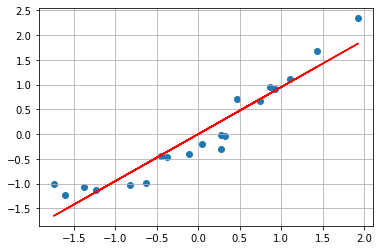

In [9]:
# train_x_stdとtrain_y_stdが交差するポイントをプロット
plt.scatter(train_x_std, train_y_std)
# 更新された重みaとバイアスbをモデルに当てはめ予測値を取得
y_learned = a*train_x_std + b
# 回帰直線をプロット
plt.plot(train_x_std,  y_learned, 'r')
plt.grid(True)
plt.show()

In [10]:
# 任意のx値で予測する
input_x = input('予測に使用するxの値を入力してください>')
x_mean = train_x.mean()           # xの平均値を求める
std = train_x.std()               # xの標準偏差を求める
x = (int(input_x) - x_mean)/std   # 入力値を標準化する
y = (a*x + b).numpy()             # 更新後のa、bを適用した回帰式で予測
y_mean = train_y.mean()           # yの平均値を求める
y_std = train_y.std()             # yの標準偏差を求める
y*y_std + y_mean                  # 予測値を標準化前の値に戻す

予測に使用するxの値を入力してください>300


1947.2206607488235